In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [3]:
np.random.seed(sum(map(ord, "distributions")))

C:\Users\Home\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


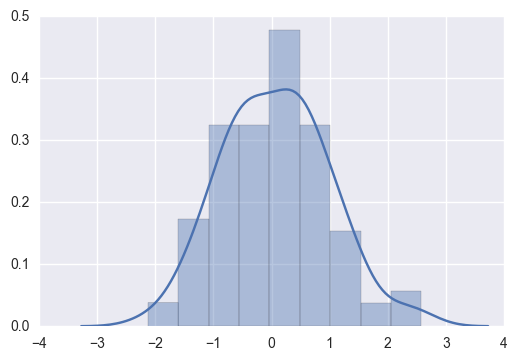

In [13]:
x = np.random.normal(size=100)
sns.distplot(x);

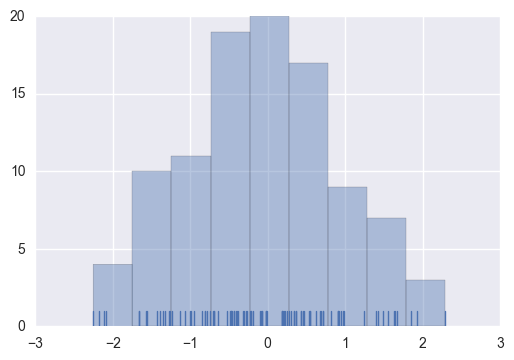

In [12]:
sns.distplot(x, kde=False, rug=True);

In [2]:
filepath='bestGraphs/AMD/CPU_RAM_jun2nov_data.csv'
all_results=pd.read_csv(filepath)
all_results=all_results.rename(columns = {'Unnamed: 0':'new_name'})
all_results.columns

Index(['new_name', 'Date', 'CPU_usage', 'RAM Used'], dtype='object')

In [3]:
AR_1_DatesDays='result_graphs_3_29/AR_1_DatesDays/RAM/daily/AMD/AR_1_DatesDays_pred.csv'
AR_1_DatesDaysdf=pd.read_csv(AR_1_DatesDays)
AR_1_DatesDaysdf.columns

Index(['Unnamed: 0', 'Date', 'Pred'], dtype='object')

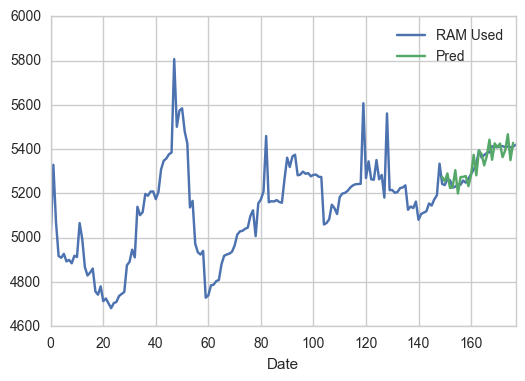

In [41]:
sns.set_style("whitegrid")
ax=all_results.plot(x='new_name', y='RAM Used')
AR_1_DatesDaysdf.plot(x='Date', y='Pred', ax=ax)

In [4]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [50]:
# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# output to static HTML file
output_notebook()

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results

show(p)

Loading BokehJS ...

In [5]:
from bokeh.models import HoverTool, BoxZoomTool

RAMorCPU=['RAM', 'CPU']
dailyorhourly=['daily', 'hourly']
all_locations=["acc",
"als",
"AMD",
"AMS",
"amsalk",
"ap10",
"ap3",
"ASH",
"ash02",
"ash02alk",
"ash02ell",
"ASH02na10",
"ASH02na11",
"ash02na14",
"ash02na15",
"ash02na18",
"ASH02NA9",
"boq",
"BRU03EU9",
"cbr01",
"CBRAC2",
"CGK",
"cgk01",
"cgk02id2",
"csyd01",
"EU7AMS",
"fra",
"FRA02EU10",
"FRA03EU11",
"gci",
"GRU01",
"HKG",
"HKG01AP5",
"HLZ",
"HLZ01AU11",
"hnd",
"HND01AP4",
"IL1MED1",
"IL2MED1",
"jer",
"JNB",
"JNB01AF3",
"JNB01AF5",
"jnb02",
"JNB02AF4",
"JNB03AF4",
"lhr03",
"LHR03EU8",
"mel",
"melau10",
"MELau10",
"mrcy",
"NA2",
"NA4",
"sin01ap8",
"sin01ap9",
"sin02ap6",
"sin03ap7",
"SNU",
"SNUna12",
"SNUna13",
"SNUna16",
"snuna17",
"SYD",
"SYDau9",
"WLG01AU12",
"yyz01",
"YYZ01CA2"
]

In [10]:
import bokeh 
from bokeh.io import output_file, show
from bokeh.layouts import row
from bokeh.palettes import Viridis3
from bokeh.plotting import figure
from bokeh.models import CheckboxGroup, CustomJS
from bokeh.models import HoverTool, BoxZoomTool

filepath='bestGraphs/AMD/CPU_RAM_jun2nov_data.csv'
all_results=pd.read_csv(filepath)
all_results=all_results.rename(columns = {'Unnamed: 0':'new_name'})
all_results.columns

output_file("line_on_off.html", title="line_on_off.py example")

            
# create a new plot with a title and axis labels
rr = figure(title="simple line example", x_axis_label='Days', y_axis_label='RAM', tools=[HoverTool(tooltips=[("RAM:", "$y{4.4}")]), BoxZoomTool()])
l=[]
# add a line renderer with legend and line thickness
l.append(rr.line(all_results['new_name'], all_results['RAM Used'], legend="Temp", line_width=2, line_color=Viridis3[0]))
l.append(rr.line(AR_1_DatesDaysdf['Date'], AR_1_DatesDaysdf['Pred'], legend="Pred", line_width=2, line_color=Viridis3[1]))

#l0=l[0]
#l1=l[1]

#print(type(l0))
#print(l0)

#snip='"""'
#for i in [0,1]:
#    snip += "l["+str(i)+"].visible = 0 in checkbox.active;"
#snip+='"""'


checkbox = CheckboxGroup(labels=["Temp", "Pred"],
                         active=[0, 1], width=100)
checkbox.callback = CustomJS.from_coffeescript(args=dict(l0=l[0], l1=l[1], checkbox=checkbox),
                             code="""
l0.visible = 0 in checkbox.active;
l1.visible = 1 in checkbox.active;
""")

layout = row(checkbox, rr)
show(layout)

INFO:bokeh.core.state:Session output file 'line_on_off.html' already exists, will be overwritten.


In [29]:
import bokeh 
from bokeh.io import output_file, show
from bokeh.layouts import row
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.models import CheckboxGroup, CustomJS, Legend
from bokeh.models import HoverTool, BoxZoomTool, ResetTool
output_file("AMD_results.html", title="Results for AMD location")

# create a new plot with a title and axis labels
rr = figure(title="AMD all models", x_axis_label='Days', y_axis_label='RAM', 
            plot_width=1000, plot_height=450, 
            tools=[HoverTool(tooltips=[("RAM:", "$y{4.4}")]), BoxZoomTool(), ResetTool()], toolbar_location="above")
rr.add_layout(Legend(location=(0, -30)), 'right')
l=[]
filepath='bestGraphs/AMD/CPU_RAM_jun2nov_data.csv'
all_results=pd.read_csv(filepath)
all_results=all_results.rename(columns = {'Unnamed: 0':'new_name'})
all_results.columns
l.append(rr.line(all_results['new_name'], all_results['RAM Used'], legend="Original Data", line_width=2, line_color=Spectral6[0]))
# add a line renderer with legend and line thickness
all_locations=["AMD"]
models=['AR_1_Dates', 'AR_1_DatesDays', 'AR_1_DatesDaysWeek', 'LR_1_Dates', 'LR_1_DatesDays']

i=1
for location in all_locations:
    for model in models:
        filepath='result_graphs_3_29/'+model+'/RAM/daily/'+location+'/'+model+'_pred.csv'
        all_results=pd.read_csv(filepath)
        l.append(rr.line(all_results['Date'], all_results['Pred'], legend=model, line_width=2, line_color=Spectral6[i]))
        i+=1

snip=""""""
print(len(l))
l0=l[0]
l1=l[1]
l2=l[2]
l3=l[3]
l4=l[4]
l5=l[5]

for i in [0,1,2,3,4,5]:
    snip += "l"+str(i)+".visible = "+str(i)+" in checkbox.active;\n"

xx=["Original Data"]
xx+=models

code="""
l0.visible = 0 in checkbox.active;
l1.visible = 1 in checkbox.active;
l2.visible = 2 in checkbox.active;
l3.visible = 3 in checkbox.active;
l4.visible = 4 in checkbox.active;
l5.visible = 5 in checkbox.active;
"""

checkbox = CheckboxGroup(labels=xx,
                         active=[0, 1, 2, 3, 4, 5], width=10)
checkbox.callback = CustomJS.from_coffeescript(args=dict(l0=l[0], l1=l[1], l2=l[2], l3=l[3], l4=l[4], l5=l[5], checkbox=checkbox),
                             code=snip)

layout = row(checkbox, rr)
show(layout)

6


In [28]:
show(layout)

TypeError: 'list' object is not callable